 # **Logistic Regression**
<hr/>

Submitted by <br>
Name: **Jasleen Kaur Sondhi** <br>
Register Number: **21122027** <br>
Class: **2nd Sem MSc Data Science**  

<hr>



## Lab Overview  
### Objectives

In this lab, we will learn how to perform logistic regression on breast cancer .

We will do the following-

1. Demonstrate the Logistic Regression for different penalties/regularisation methods - none, l1, l2 (you may use 'saga' solver as the parameter)
2. What happens when the Maximum Iterations are kept as 1, 2, 5, 10, 20, 50, 100, 500 and 1000? Is there any change in the accuracy.
3. Get the attributes: classes_, coef_ and intercept_ and print the same in the above case.


### Problem Definition
Apply Logistic Regression for Breast Cancer Dataset.

### References
Links referred:
1. https://www.quora.com/What-is-regularization-in-machine-learning
2. https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a
3. https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea
4. https://www.geeksforgeeks.org/regularization-in-machine-learning/
5. https://analyticsindiamag.com/regularization-in-machine-learning-a-detailed-guide/
6. https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
<hr/>

## Performing Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read in the data and check the first 5 rows
df = pd.read_csv('../input/breast-cancer-dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Checking for missing values 
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
df.shape

(569, 32)

In [5]:
df.dropna(axis=1, inplace=True)

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# Normalizing the labels
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X = df.iloc[:,2:].values
y = df.iloc[:,1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
X_train

array([[-0.24972485, -1.00738316, -0.30659508, ..., -0.23272538,
        -1.4021895 , -1.18480299],
       [-0.76349378, -0.10876491, -0.79007792, ..., -0.78909598,
         0.60541194, -0.7289305 ],
       [ 3.40830993, -0.39929562,  3.48747286, ...,  2.41056213,
         1.20816327,  0.24817452],
       ...,
       [-0.53449962, -0.75063509, -0.55724276, ..., -1.0151686 ,
        -0.68799196, -1.12987859],
       [-0.05302474, -1.36547915, -0.07036706, ..., -0.21163932,
        -1.19342407, -0.60974456],
       [ 0.20239181, -1.02089622,  0.11411981, ..., -0.54223853,
        -0.92030237, -1.2199546 ]])

In [13]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression()
classifer.fit(X_train, y_train)

LogisticRegression()

In [14]:
predictions  = classifer.predict(X_test)

[[136   2]
 [  5  85]]


<AxesSubplot:>

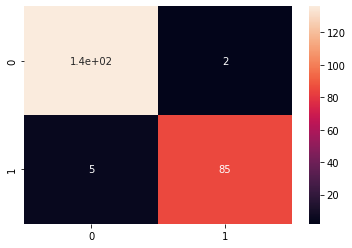

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
sns.heatmap(cm, annot=True)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9692982456140351


#### 1. Demonstrate the Logistic Regression for different penalties/regularisation methods - none, l1, l2 (you may use 'saga' solver as the parameter)

In [17]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(penalty='l2', solver='saga')
classifer.fit(X_train, y_train)
predictions  = classifer.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9649122807017544


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [18]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(penalty='l1', solver='saga',max_iter=1)
classifer.fit(X_train, y_train)
predictions  = classifer.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9517543859649122


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [19]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(penalty='none', solver='saga', max_iter=1)
classifer.fit(X_train, y_train)
predictions  = classifer.predict(X_test)
print(accuracy_score(y_test,predictions))

0.9342105263157895


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Inference- L2 regularization gives the highest accuracy.

#### 2. What happens when the Maximum Iterations are kept as 1, 2, 5, 10, 20, 50, 100, 500 and 1000? Is there any change in the accuracy?

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

li_iter =[1,2,5,10,20,50,100,500,1000] 
accu_df = pd.DataFrame()
accu_df['Max_iteration'] = [1,2,5,10,20,50,100,500,1000]
li2 = []
li3 = []
li4 = []
li5 = []

j = 1
for i in li_iter:
    classifer = LogisticRegression(penalty = 'l1', max_iter=i, solver = 'saga')
    classifer.fit(X_train, y_train)
    predictions  = classifer.predict(X_test)
    li2.append(accuracy_score(y_test,predictions))
    li3.append(classifer.classes_)
    li4.append(classifer.coef_)
    li5.append(classifer.intercept_)
    j += 1

accu_df['Accuracy'] = li2
accu_df['Classes'] = li3
accu_df["Coefficient"] = li4
accu_df["Intercept"] = li5

accu_df
    

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

,Max_iteration,Accuracy,Classes,Coefficient,Intercept
0,1,0.942982,"[0, 1]","[[0.25142968642731867, 0.15762190863619896, 0....",[-0.1576960343121528]
1,2,0.964912,"[0, 1]","[[0.3147680603477605, 0.23346144003344624, 0.3...",[-0.30130458117868403]
2,5,0.964912,"[0, 1]","[[0.3703259675978322, 0.26703685255395504, 0.3...",[-0.3796567328317808]
3,10,0.960526,"[0, 1]","[[0.3824044085762721, 0.30664403938195745, 0.3...",[-0.4375887584210158]
4,20,0.960526,"[0, 1]","[[0.39959261051357653, 0.3346311652850581, 0.3...",[-0.5708223774554692]
5,50,0.969298,"[0, 1]","[[0.3662636808221485, 0.2666639418841274, 0.35...",[-0.6565591322225878]
6,100,0.969298,"[0, 1]","[[0.2704432971363884, 0.10800534052504648, 0.2...",[-0.7063825075541651]
7,500,0.964912,"[0, 1]","[[0.0, 0.0, 0.0, 0.0030580928905010636, 0.0, 0...",[-0.6871451138367806]
8,1000,0.960526,"[0, 1]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2170912...",[-0.7040714681660489]


#### 3. Get the attributes: classes_, coef_ and intercept_ and print the same in the above case.


In [21]:
classifer.classes_

array([0, 1])

In [22]:
classifer.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.21709129,  0.        ,  0.        ,
         1.37027697,  0.        ,  0.        ,  0.25227735, -0.59236223,
        -0.44037553,  0.        ,  0.        ,  0.        , -0.1609274 ,
         1.42465025,  1.34620485,  0.53285039,  1.30352331,  0.64091256,
         0.        ,  0.47387559,  1.6984266 ,  0.36948491,  0.        ]])

In [23]:
classifer.intercept_

array([-0.70407147])

<hr/>

## Conclusion/Results

In this lab, I succesfully learned how to implement Logistic Regression using Machine Learing concepts. 
The accuracy of the model varies with the maximum iterations values and the regularization method that we use.